# GE 461 INTRODUCTION TO DATA SCIENCE HOMEWORK 2
# Name: Can Dilsiz
# ID : 21702688

In [92]:
# Libraries Used in the Assignment
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.manifold import Isomap
from sklearn.manifold import TSNE


# QUESTION 1: PCA DIMENSIONALITY REDUCTION

In [93]:
# Reading the Data Set "digits.txt" and Labels "labels.txt"
digits = np.loadtxt('digits.txt') # 5000 ROWS, 400 COLMNS
labels = np.loadtxt('labels.txt') # 5000 ROWS     0 COLMS

# substracting mean of whole data from each sample
centered_data = digits - np.mean(digits, axis = 0)
centered_data


array([[-0.00271372, -0.0108965 , -0.01956946, ..., -0.01236234,
        -0.00791996, -0.00309172],
       [-0.00271372, -0.0108965 , -0.01956946, ...,  0.47003766,
         0.21558004, -0.00309172],
       [-0.00271372, -0.0108965 , -0.01956946, ..., -0.01236234,
        -0.00791996, -0.00309172],
       ...,
       [-0.00271372, -0.0108965 , -0.01956946, ..., -0.01236234,
        -0.00791996, -0.00309172],
       [-0.00271372, -0.0108965 , -0.01956946, ..., -0.01236234,
        -0.00791996, -0.00309172],
       [-0.00271372, -0.0108965 , -0.01956946, ..., -0.01236234,
        -0.00791996, -0.00309172]])

In [94]:
# Tranining Data
training_data = centered_data[:2500, :]

# Testing Data
testing_data = centered_data[2500:, :]

# Training Labels
training_labels = labels[:2500]

# Testing Labels
testing_labels = labels[2500:]


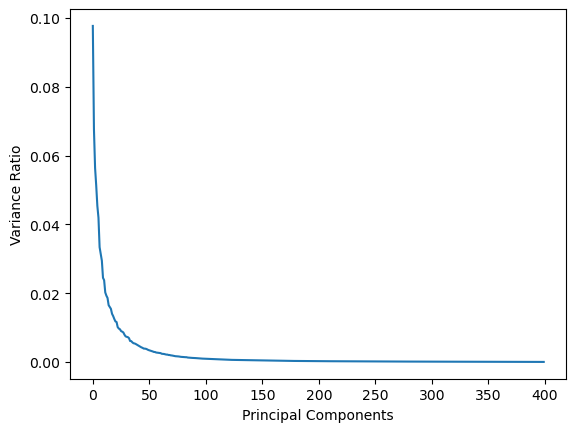

In [95]:
# Use PCA to obtain new bases
pca = PCA(n_components = training_data.shape[1]) # n_components = 50
pca.fit(training_data)

# Plot the Eigen Values
plt.plot(pca.explained_variance_ratio_)
plt.xlabel('Principal Components')
plt.ylabel('Variance Ratio')
plt.show()

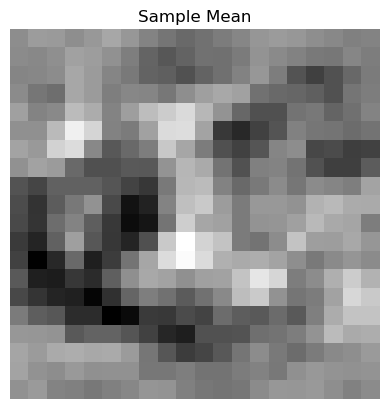

In [96]:
# Inspecting the graph, between 50-100 components are enough to represent the important data.

n_components = 10
mean = np.mean(training_data, axis=0)

# Step 3: Display sample mean and chosen bases as images
mean_image = np.reshape(mean, (20, 20)) # 400 dimensional Data
plt.imshow(mean_image, cmap = "gray")
plt.axis("off")
plt.title('Sample Mean')
plt.show()



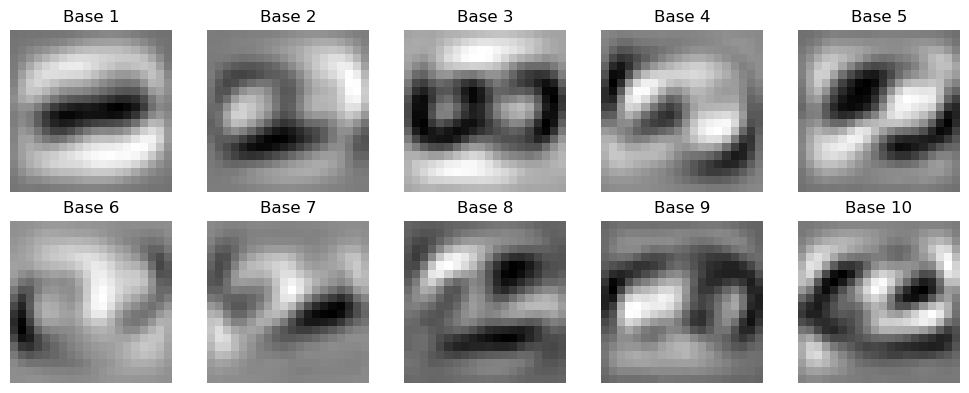

In [97]:
fig, axes = plt.subplots(nrows = 2, ncols =5, figsize = (10,4))

# Display chosen bases as images
bases = pca.components_[:n_components, :]
for i in range(n_components):
    
    row = i // 5
    col = i % 5
    base_image = np.reshape(bases[i], (20, 20))
    axes[row, col].imshow(base_image,cmap = "gray")
    axes[row, col].axis("off")
    axes[row, col].set_title('Base {}'.format(i+1))

plt.tight_layout()    
plt.show()

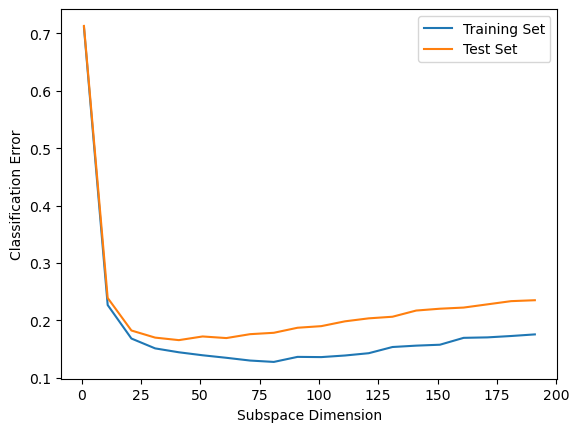

In [98]:
# Project data onto different subspaces and train Gaussian classifier and plot Classification Error

# Choose at least 20 different subspaces
n_dims = np.arange(1, 201, 10)
train_errors = []
test_errors = []

for n in n_dims:
    # Project data onto subspace
    subspace = pca.components_[:n, :]
    # Dot product Traning & Testing Data with Transposed Subspaces
    train_proj = np.dot(training_data, subspace.T)
    test_proj = np.dot(testing_data, subspace.T)
    
    # Gaussian Classifier
    gnb = GaussianNB()
    gnb.fit(train_proj, training_labels)
    
    # Predict labels and compute accuracy
    train_pred = gnb.predict(train_proj)
    test_pred = gnb.predict(test_proj)
    
    # Calculate Accuracy Score via comparing with Labels
    train_acc = accuracy_score(training_labels, train_pred)
    test_acc = accuracy_score(testing_labels, test_pred)
    
    train_errors.append(1 - train_acc)
    test_errors.append(1 - test_acc)

# Plot classification error vs. Subspace Dimension
plt.plot(n_dims, train_errors, label='Training Set')
plt.plot(n_dims, test_errors, label='Test Set')
plt.xlabel('Subspace Dimension')
plt.ylabel('Classification Error')
plt.legend()
plt.show()

# QUESTION 2: ISOMAP DIMENSIONALITY REDUCTION

In [99]:
digits = np.loadtxt('digits.txt') # 5000 ROWS, 400 COLMNS
labels = np.loadtxt('labels.txt') # 5000 ROWS     0 COLMS

centered_data = digits - np.mean(digits, axis = 0)

# Tranining Data
training_data = centered_data[:2500, :]

# Testing Data
testing_data = centered_data[2500:, :]

# Training Labels
training_labels = labels[:2500]

# Testing Labels
testing_labels = labels[2500:]

# Use Isomap to obtain low-dimensional embeddings
n_neighbors = 5 # parameter for Isomap
n_components = 50 # number of dimensions to project onto

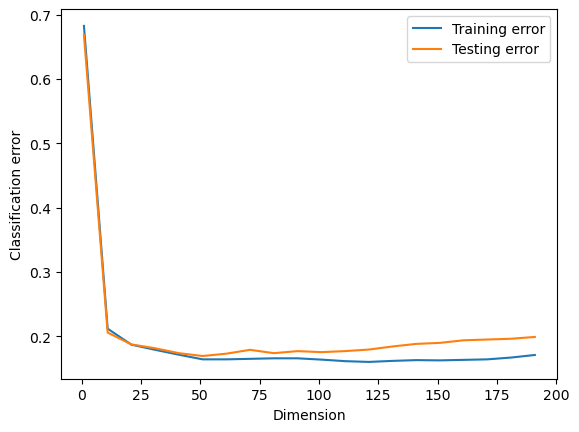

In [100]:
# Isomap Dimensionality Reduction using full centered Data
iso = Isomap(n_neighbors=n_neighbors, n_components=n_components, metric = "euclidean")
isomapData = iso.fit_transform(centered_data)

# Range of dimensions for testing
dim_range = range(1, 201, 10)

# Training a Gaussian classifier for each dimensionality
train_errors = []
test_errors = []

Data_train_proj = isomapData[:2500, :]
Data_test_proj = isomapData[2500:, :]

for n_dim in dim_range:
    ISO = Isomap(n_components = n_dim)
    # Project the data onto the subspace
    X_train_proj = ISO.fit_transform(Data_train_proj)
    X_test_proj = ISO.transform(Data_test_proj)

    # Gaussian Classifier
    gnb = GaussianNB()
    gnb.fit(X_train_proj,training_labels)
    
    # Predict labels and compute accuracy
    train_pred = gnb.predict(X_train_proj)
    test_pred = gnb.predict(X_test_proj)
    
    # Calculate Accuracy Score via comparing with Labels
    train_acc = accuracy_score(training_labels, train_pred)
    test_acc = accuracy_score(testing_labels, test_pred)
    
    train_errors.append(1 - train_acc)
    test_errors.append(1 - test_acc)
    
# Classification Error vs Dimension
plt.plot(dim_range, train_errors, label='Training error')
plt.plot(dim_range, test_errors, label='Testing error')
plt.xlabel('Dimension')
plt.ylabel('Classification error')
plt.legend()
plt.show()

# QUESTION 3:  t-SNE DIMENSIONALITY REDUCTION

In [101]:
digits = np.loadtxt('digits.txt')
labels = np.loadtxt('labels.txt')

centered_data = digits - np.mean(digits, axis = 0)

tsne = TSNE(n_components = 2, learning_rate= 300, perplexity = 5, init='random', n_iter=500, n_iter_without_progress=100)
embedded = tsne.fit_transform(centered_data)


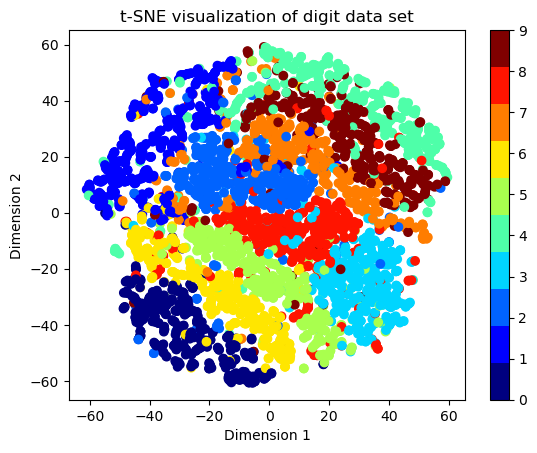

In [102]:
# Plot the resulting 2D embedding with labels
plt.scatter(embedded[:, 0], embedded[:, 1], c = labels, cmap=plt.cm.get_cmap('jet', 10))
plt.colorbar()
plt.title('t-SNE visualization of digit data set')
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.show()